# This is project to understand the employee atrrition and factors impacting it. 
In this code you can find ,
1. Importing libraries required
2. Cleaning and subsetting required data 
3. Exploration analysis
4. Decision tree to analylize attrition
5. Conclusion



The data contains attrition data of an imaginary company and only critical resources(Performa rating 3&4).
Data dictionary for some of the columns:
--> Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

-->EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

-->JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

-->JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

-->PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

-->RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

-->WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
path=r'/Users/keerthiputti/Desktop/People analytics project/Data'

In [3]:
df=pd.read_csv(os.path.join(path,'Original data','WA_Fn-UseC_-HR-Employee-Attrition.csv'),index_col=False)

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# setting the screen to display all columns
pd.set_option('display.max_columns', None)

In [9]:
df.head(12)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


# Cleaning data

In [10]:
# Check for duplicates in the main data

dups = df.duplicated()
dups.sum()

#no duplaictes

0

In [11]:
# missing data check

df.isnull().sum()

#no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
#mixed value check

#mixed data columns
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
    
    #no mixed value.

The data is already clean and the columns names and data types are good to go.

# Exploration

In [13]:
#Creating correlation matrix
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


subsetting only required columns to see correlation

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
df_sub=df [['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender','JobLevel', 'JobRole', 
       'MaritalStatus', 'MonthlyIncome','OverTime', 'PerformanceRating','TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']]



In [16]:
df_sub

,Age,Attrition,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,2,Female,2,Sales Executive,Single,5993,Yes,3,8,6,0,5
1,49,No,Research & Development,8,1,3,Male,2,Research Scientist,Married,5130,No,4,10,10,1,7
2,37,Yes,Research & Development,2,2,4,Male,1,Laboratory Technician,Single,2090,Yes,3,7,0,0,0
3,33,No,Research & Development,3,4,4,Female,1,Research Scientist,Married,2909,Yes,3,8,8,3,0
4,27,No,Research & Development,2,1,1,Male,1,Laboratory Technician,Married,3468,No,3,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,3,Male,2,Laboratory Technician,Married,2571,No,3,17,5,0,3
1466,39,No,Research & Development,6,1,4,Male,3,Healthcare Representative,Married,9991,No,3,9,7,1,7
1467,27,No,Research & Development,4,3,2,Male,2,Manufacturing Director,Married,6142,Yes,4,6,6,0,3
1468,49,No,Sales,2,3,4,Male,2,Sales Executive,Married,5390,No,3,17,9,0,8


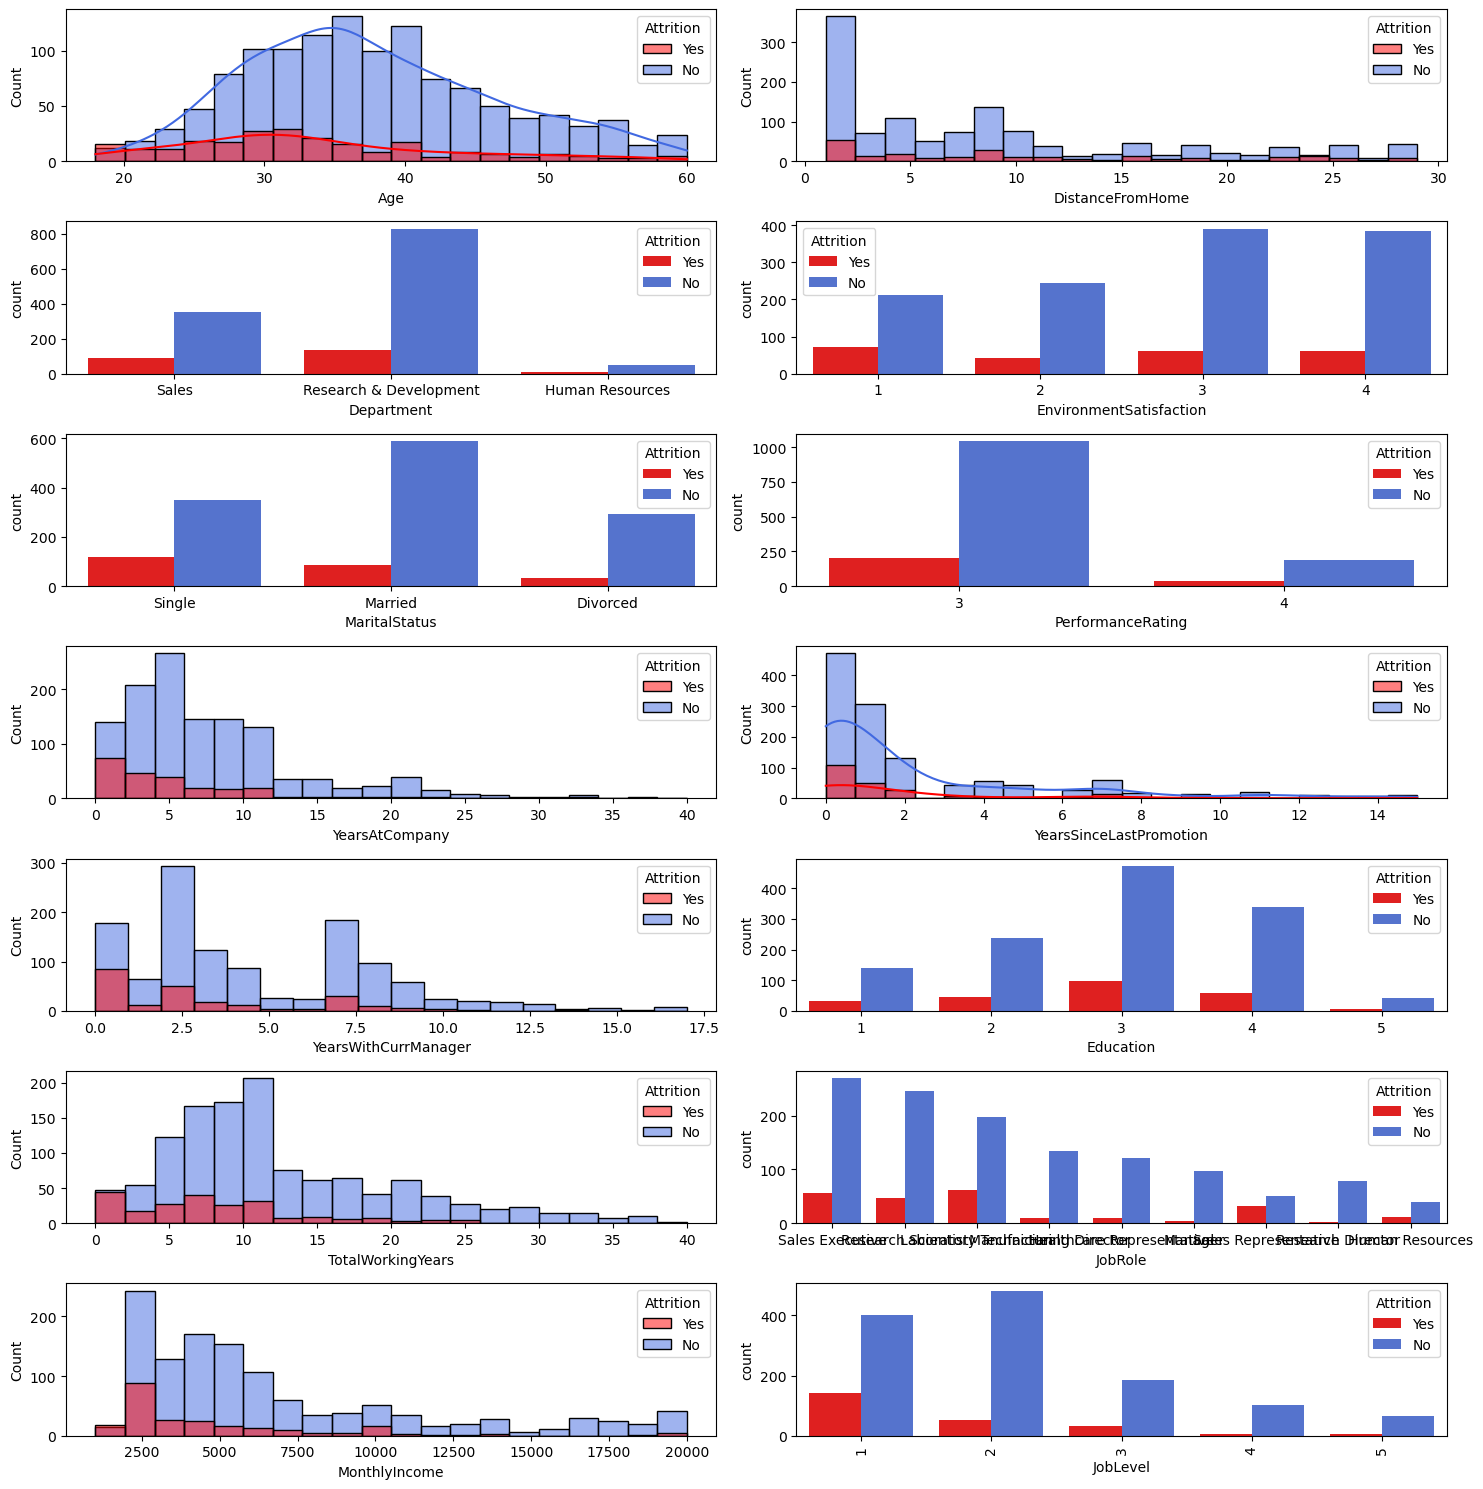

In [113]:
#sns.set(style="dark")  
sns.set_color_codes(palette='bright')
fig,axs = plt.subplots(7,2, figsize = (15,15))
sns.histplot(data=df_sub, x="Age",hue="Attrition",bins=20,kde=True, ax=axs[0, 0],palette=('red','royalblue'))
sns.histplot(data=df_sub, x="DistanceFromHome",hue="Attrition",bins=20, ax=axs[0, 1],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="Department",hue="Attrition", ax=axs[1, 0],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="EnvironmentSatisfaction",hue="Attrition", ax=axs[1, 1],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="MaritalStatus",hue="Attrition", ax=axs[2, 0],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="PerformanceRating",hue="Attrition", ax=axs[2, 1],palette=('red','royalblue'))
sns.histplot(data=df_sub, x="YearsAtCompany",hue="Attrition",bins=20, ax=axs[3,0],palette=('red','royalblue'))
sns.histplot(data=df_sub, x="YearsSinceLastPromotion",hue="Attrition",bins=20,kde=True, ax=axs[3,1],palette=('red','royalblue'))
sns.histplot(data=df_sub, x="YearsWithCurrManager",hue="Attrition",bins=18,ax=axs[4,0],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="Education",hue="Attrition",ax=axs[4,1],palette=('red','royalblue'))
sns.histplot(data=df_sub, x="TotalWorkingYears",hue="Attrition",ax=axs[5,0],bins=20,palette=('red','royalblue'))
sns.histplot(data=df_sub,x='MonthlyIncome',hue='Attrition',ax=axs[6,0],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="JobLevel",hue="Attrition",ax=axs[6,1],palette=('red','royalblue'))
sns.countplot(data=df_sub, x="JobRole",hue="Attrition",ax=axs[5,1],palette=('red','royalblue'))
plt.xticks(rotation=90)
fig.tight_layout()

In [ ]:
sns.catplot(
    data=df_sub, x="Gender", y="Attrition", hue="sex",
    kind="violin", bw=.25, cut=0, split=True,
)

In [18]:
#gender attrition

gender_attrition=pd.crosstab(df_sub['Gender'],df_sub['Attrition'],dropna=False)

In [19]:
gender_attrition

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [20]:
#average satisafaction genderwise
df_sub.groupby('Gender').agg({'EnvironmentSatisfaction':['mean']})

,EnvironmentSatisfaction
,mean
Gender,
Female,2.721088
Male,2.722222


In [21]:
#average enronment satisfaction rolewise

df_sub.groupby('JobRole').agg({'EnvironmentSatisfaction':['mean']})

,EnvironmentSatisfaction
,mean
JobRole,
Healthcare Representative,2.770992
Human Resources,2.596154
Laboratory Technician,2.718147
Manager,2.764706
Manufacturing Director,2.917241
Research Director,2.500000
Research Scientist,2.726027
Sales Executive,2.671779


In [22]:
#attrition in diffrent job roles

JobRole_attrition=pd.crosstab(df_sub['JobRole'],df_sub['Attrition'],dropna=False,normalize='index')

In [23]:
JobRole_attrition

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


Its interesting to see even though Reasearch Director has the least environment satisfaction, there attrition rate is not very high.

In [24]:
df_sub['PerformanceRating'].unique()

array([3, 4])

In [25]:
# attrtion in differnt departments
dep_attrition=pd.crosstab(df_sub['Department'],df_sub['Attrition'],dropna=False,normalize='index')

In [26]:
dep_attrition

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


In [27]:
# %of attrition due to distance

distance_attrition=pd.crosstab(df_sub['DistanceFromHome'],df_sub['Attrition'],dropna=False,normalize='index')

In [28]:
distance_attrition

Attrition,No,Yes
DistanceFromHome,,
1,0.875000,0.125000
2,0.867299,0.132701
3,0.833333,0.166667
4,0.859375,0.140625
5,0.846154,0.153846
6,0.881356,0.118644
7,0.869048,0.130952
8,0.875000,0.125000
9,0.788235,0.211765


In [29]:
#agewise attrition

age_attrition=pd.crosstab(df_sub['Age'],df_sub['Attrition'],dropna=False,normalize='index')

In [30]:
age_attrition

Attrition,No,Yes
Age,,
18,0.500000,0.500000
19,0.333333,0.666667
20,0.454545,0.545455
21,0.538462,0.461538
22,0.687500,0.312500
23,0.714286,0.285714
24,0.730769,0.269231
25,0.769231,0.230769
26,0.692308,0.307692


# The insights gathered from the above exploration
Attrition is high in these categories :
-Sales department has the highest attrition. 
-Employees most probably change jobs untill early 30s and then slow down.
-Attrition is highest in the first year with the company and intital years of working.
-Signle people change jobs quickly compared married/divorced people.
-Less salary leads to more attrition.

# 6. Decision tree

In [31]:
# Importing libraries required
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

In [150]:
# Preprocess the data by selecting features and target variable
X = df_sub[['Age', 'MonthlyIncome', 'YearsAtCompany','DistanceFromHome']]
y = df_sub['Attrition']

In [151]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
#Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
#Make predictions on the testing set
y_pred = model.predict(X_test)

In [154]:
#Evaluate the model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7505668934240363


In [155]:
#Export the decision tree to a DOT file
export_graphviz(model, out_file="decision_tree.dot", 
                feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)

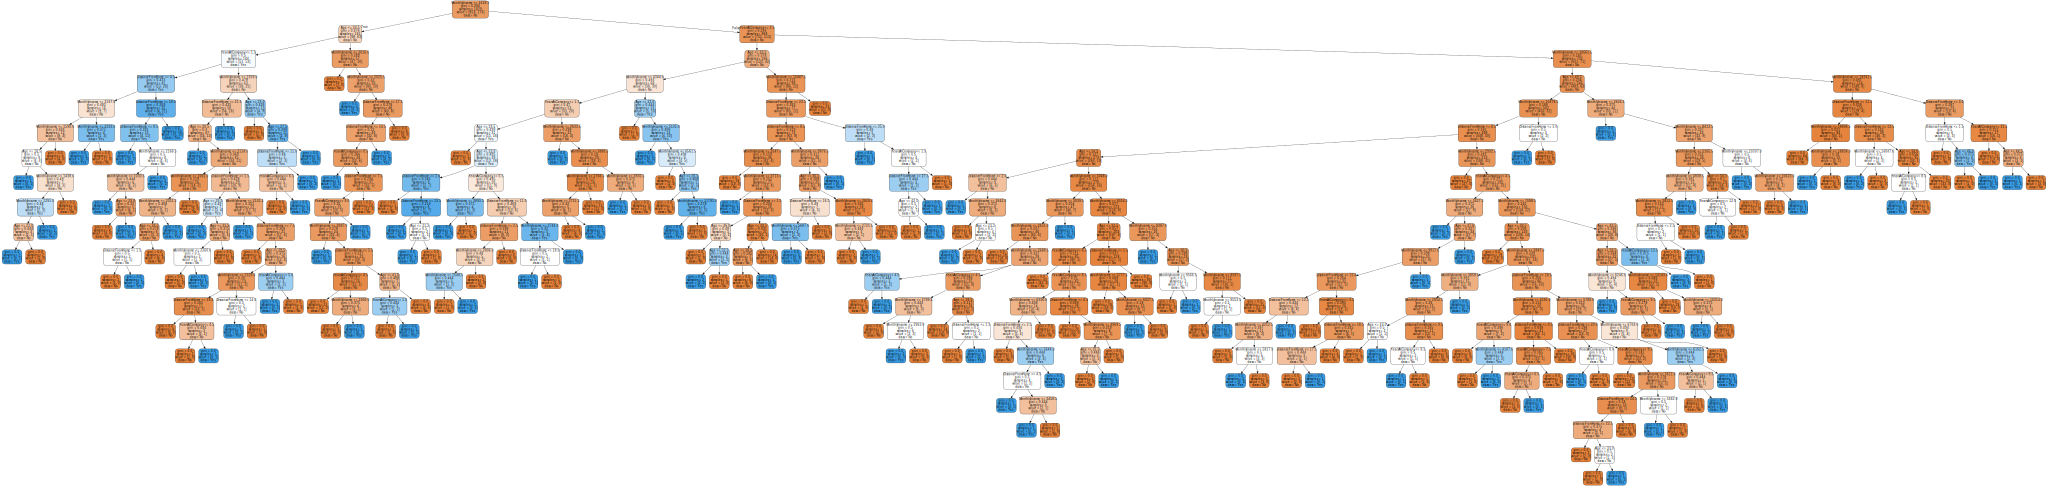

In [39]:
#Visualizing the decision tree using Graphviz

with open("decision_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [107]:
#Visualizing the decision tree using Graphviz

graph = graphviz.Source(dot_graph, format="png") 

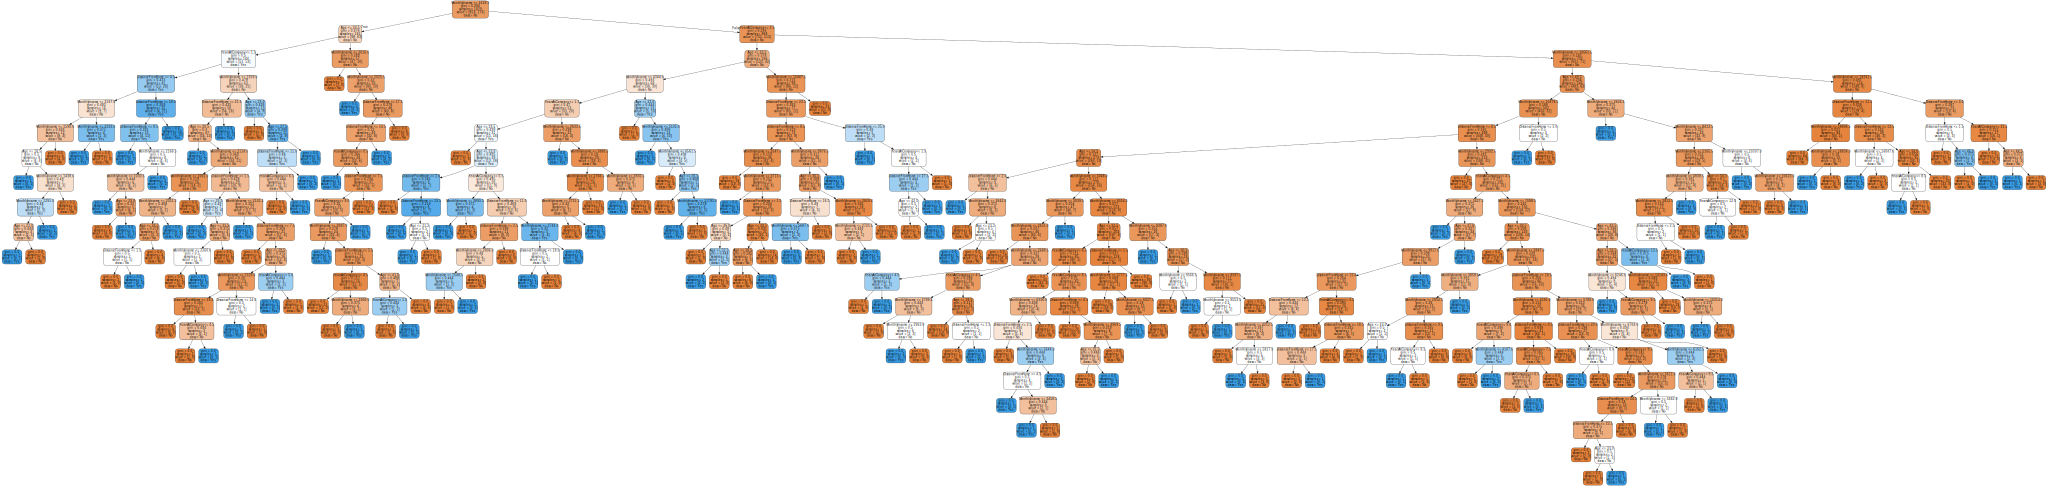

In [41]:
graph

In [108]:
graph.render("decision_tree_graphivz")


'decision_tree_graphivz.png'

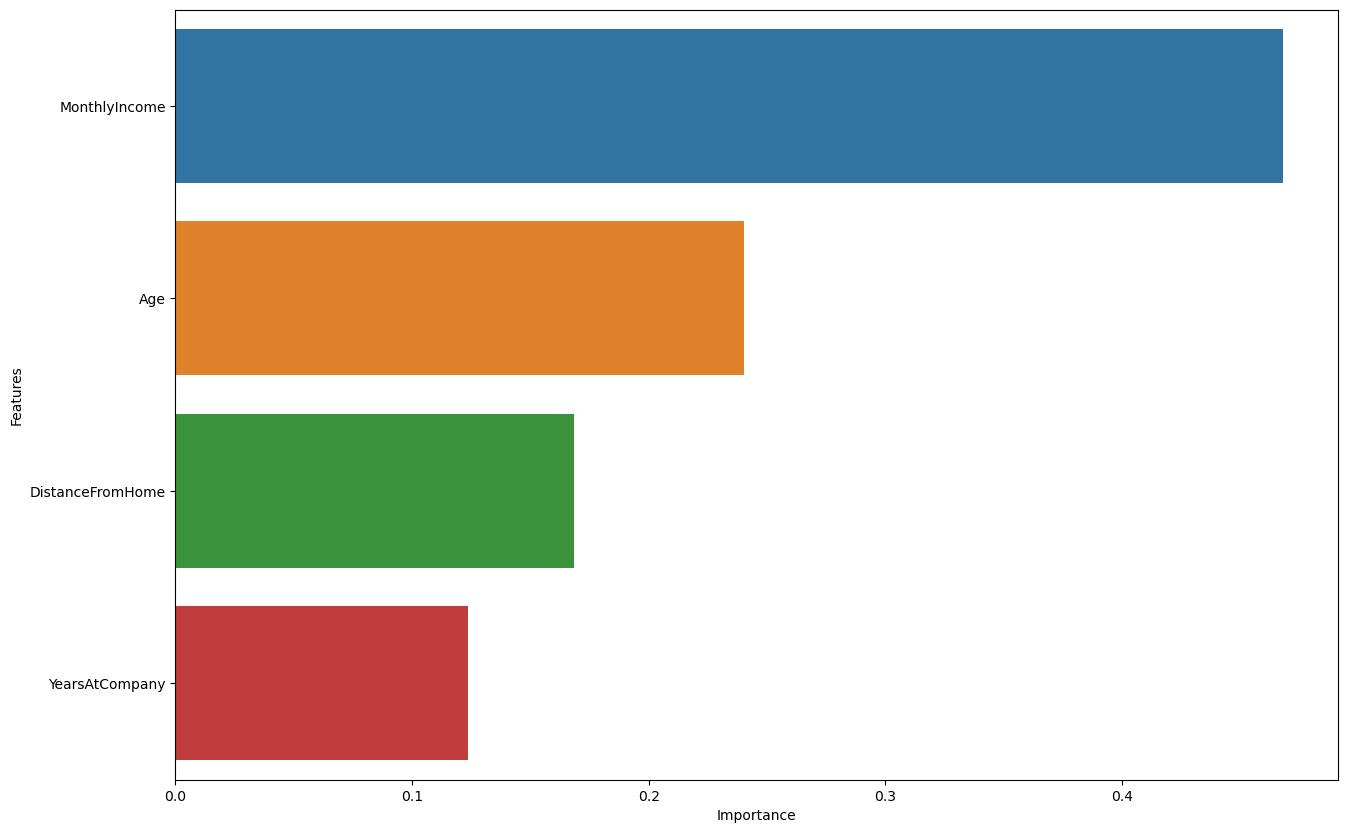

In [135]:
IP = pd.DataFrame({"Features": np.array(X.columns), "Importance": model.feature_importances_})
IP = IP.sort_values(by=['Importance'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IP[:10])
plt.show()

Decision tree shows 77% accuracy.The algorithm can be run multiple times to predict the attrition.To conclude our analysis, Income is the most important factor followed by age, Distance from home and Year at the company.

In [94]:
df_sub.to_csv(os.path.join(path,'Prepared data','Analized_attrition_data.csv'),index=False)